# POL280 Bayesian Modelling Memo & Codes

(Annotated codes are originally provided by Christopher Hare)

## Lecture 1: Introduction (04/13/2017) 

###  Monte Carlo Simulation

inside
   0    1 
2106 7894 

[1] 3.1392

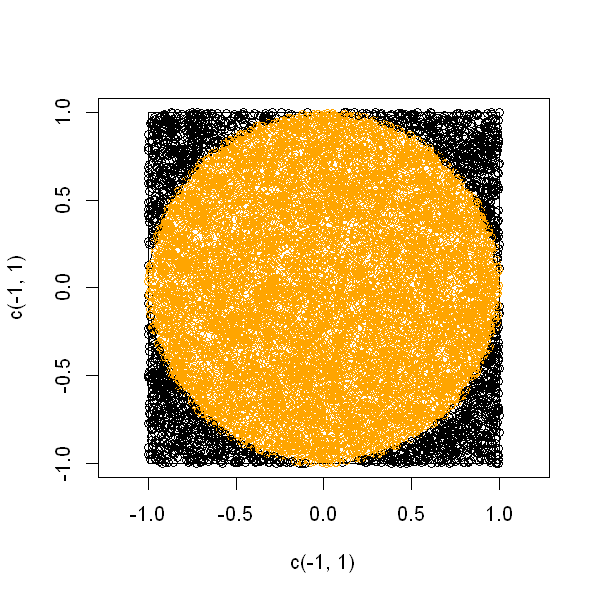

In [3]:
## Monte Carlo Simulation ##

#install.packages("plotrix")
library(plotrix)
library(grid)

options(repr.plot.width=5, repr.plot.height=5)
## Plot Rectangle and Circle
plot(c(-1, 1), c(-1, 1), type = "n", asp = 1)
rect(-1, -1, 1, 1)
draw.circle(0, 0, 1)

## Conduct Simulation 
nsamp <- 10000 # The size of sample
inside <- NA # Storage for those values inside the cirlce
for(i in 1:nsamp){
  x <- runif(2, -1, 1) ## Draw two values from uniform distribution (-1, 1)
  if (sqrt(x[1] * x[1] + x[2] * x[2]) < 1) {
    inside[i] <- 1; points(x[1], x[2], col = "orange")
  }
  if (sqrt(x[1] * x[1] + x[2] * x[2]) > 1) {
    inside[i] <- 0; points(x[1], x[2], col = "black")
  }
}

table(inside)
4 * (7848 / 10000)

## Lecture 2: Simple Bayesian Models and Priors (04/20/2017)

### The Monty Hall Problem

Suppose you're on a game show and you're given teh choice of three doors: Behind one door is a car; behind the otheres, goats. You pick a door, say No.1, and the host, who knows what's behind the doors, opens another door, say No.3, which has a goat. He then says to you "Do you wan to pick door No.2?" Is it to your advantage to switch your choice?

Let's pick door 1, and Monty then opens door 2 to show us a goat.

Let A represent the outcome that the car is behind door 1. Let B represent the event that we're shown a goat behind door 2:

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

Let's Simulate by R!

In [1]:
## Monty Hall Problem Simulation ##
doors <- c("1", "2", "3") # Three Doors 
sim_montyhall <- function(door){
car <- sample(doors, 1) # define the door with car
pick <- doors[door] # your pick of the door
open <- sample(doors[which(doors!=car & doors!=pick)], 1) # defined the door opened
return(pick==car) # return if the car is behind your picked door.
}
sims <- replicate(10000, sim_montyhall(1) ) #repeat the process many times
mean(sims) # The probability

[1] 0.3314

### Bayesian Inference

#### Do Statistical Inference

In the statistical inference context, A is replaced with $\theta$ (unknown parameters), and B is replaced with $y$ (data). Therefore, the equation becomes:

\begin{align}
P(\theta|y) &= \frac{P(\theta) P(y|\theta)}{P(y)} \\
&\propto P(\theta) L(\theta|y)
\end{align}

Intuitively stated:

Posteriot Probability (of parameter level) $\propto$ Prior Probability $\times$ Likelihood Function

It's all about **distribution**.

#### Setting Prior

Given the function given above, **prior matters** the most when the **data is sparse** (small size?) Data dominates the prior when there is enough data.

The variance of prior matters. As the **variance of prior distribution increases**, the **impact of data on poterior distribution increases**.

### Bayesian Mechanics

#### Three Steps to Model Bayesan

1. Specify 1) the probability model of **how $y$ were generated**, & 2) **prior belief** of $\theta$ (probability distribution)

2. **Update $\theta$** by conditioning the probability model on the **data**.

3. Evaluate model fit and sensitivity.

#### First Step (1): Probability Models

An assumption about the probability distribution $p(y | \theta)$ that generated $y$. Defined as **PDF** (probability density functons) **if $y$ is continuous** random variables, defined as **PMF** (probability mass functions) **if $y$ is discrete** random variables.

$p(y | \theta)$ is also called **likelihood function**. It is calculated as:

$$L(\theta | y) = \Pi_{i=1}^n p(y_i | \theta)$$

Easier to with natural log of the likelihood:

$$\mathit{l}(\theta | y) = \mbox{log}L(\theta | y)$$ 

Because the original likelihood often become very small, so we want to deal with the manageable numbers by taking log of it.  
 
* Use of MLE($\hat{\theta}$) by frequentists cannot answer questions such as: $p (\theta > 0)$; $p(\theta \in (a, b))$ or relative likelihood of competing models.





#### First Step (2): Specifying Priors

**Conjugate priors** produce posterior densities of the same distributional family as the prior.

* **Beta (prior) - Binomial (likelihood) $\Rightarrow$  Beta posterior**

\begin{align}
\mbox{Beta Prior } p(\theta) &= \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \\
\mbox{Binomial Likelihood } &= 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y}  
\end{align}

Then (can take the constant out for the minimization problem): 

\begin{align}
\mbox{Posterior } &\propto \mbox{Prior} \times \mbox{Likelihood} \\
\pi(\theta | y) &\propto \left\{ \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \right\} \times \left\{ 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y} \right\} \\
&\propto \theta^{\alpha - 1 + y} + (1 - \theta)^{\beta - 1 + n - y}
\end{align}

The Solution is:

\begin{align}
\mbox{Posterior } \pi (\theta | y) &\approx \mbox{Beta}( \alpha + y, \beta + n - y) \\
E(\theta | y) &\approx \frac{\alpha + y}{\alpha + \beta + n} 
\end{align}

Try in R!

In [7]:
library(dplyr) ## Library dplyr package 
load("../data/POL280/baseball.Rda") ## Import data
#
career_filtered <- career %>% filter(AB >= 500) ## Filter data as AB >=500
m <- MASS::fitdistr(career_filtered$average, dbeta,
                    start = list(shape1 = 1, shape2 = 10)) ## Fitting distribution
alpha0 <- m$estimate[1]
beta0 <- m$estimate[2]
#
career_eb <- career %>% mutate(eb_estimate = (H + alpha0) / (AB + alpha0 + beta0))

Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"

* **Gamma (Prior) - Poisson (Likelihood) $\Rightarrow$ Gamma Posterior**

\begin{align}
\mbox{Gamma } &= \frac{\beta^{\alpha}}{\Gamma (\alpha)} \theta^{\alpha-1} e^{- \beta \theta} \\
\mbox{Poisson PMF } &= p(y | \theta) = \frac{e^{-\theta} \theta^{y_i}}{y_i !} \\
\mbox{Poisson Likelihood } &= \mathit{L}(\theta | y) = \hat{\Pi}_{i=1}^n \frac{e^{-\theta} \theta^{y_i}}{y_i !} \\
&= \frac{e^{-\theta n} \theta^{\sum_{i=1}^{n} y_i} }{y_1 ! y_2 ! \dots y_n !} \\
\pi(\theta | y) &\propto \frac{\beta^{\alpha}}{\Gamma (\alpha)} \theta^{\alpha-1} e^{- \beta \theta} \times \frac{e^{-\theta n} \theta^{\sum_{i=1}^{n} y_i} }{y_1 ! y_2 ! \dots y_n !} \\
&\propto \theta^{\alpha - 1 + \Sigma y} e^{- \theta (\beta + n)} \\
&\propto \mbox{Gamma }(\alpha + \Sigma y, \beta + n)
\end{align}

## Lecture 3 Sampling (04/27/2017)

### Priors and Posteriors

 * **Conjugate priors** and **solicited priors**. Solicited priors are often more difficult to defend (convenient distribution to get better result...) <br><br>
 
 * If we want the prior to be **essentially flat**, it is popular to use uniform distibution (computationally challenging), or diffused normal (i.e., very high variance. Computationally little more easy).

### Possible Prior Distibutions

#### Beta Distribution

\begin{align}
B(\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1}
\end{align}

This is a PDF on $[0, 1]$ interval, with expected value $\cfrac{\alpha}{\alpha + \beta}$

Examples of the distribution.

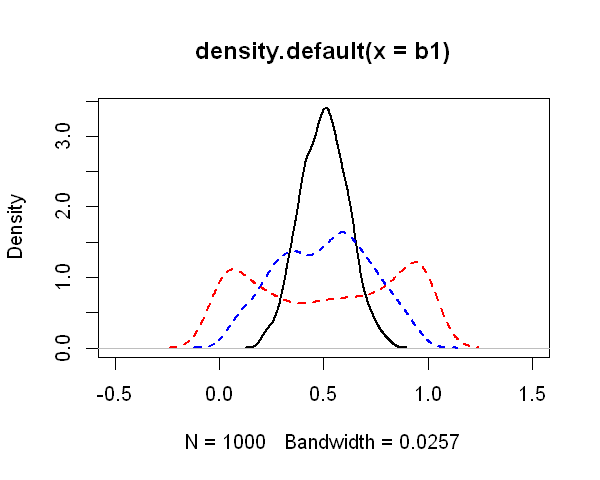

In [28]:
b1 <- rbeta(1000,10,10) # alpha = beta (large)
b2 <- rbeta(1000,2,2) # alpha = beta (small)
b3 <- rbeta(1000,0.5,0.5) # alpha = beta (very small)

options(repr.plot.width=5, repr.plot.height=4)
plot(density(b1), col="black", lty = 1, lwd=2, xlim = c(-0.5, 1.5))
lines(density(b2), col="blue", lty = 2, lwd = 2)
lines(density(b3), col="red", lty = 2, lwd = 2)

$$\mbox{Binomial Likelihood } = 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y} 
$$
 * The value of $\theta$ most likely to have produced the observed data is $\frac{y}{n}$

Then, from the last lecture, **posterior** is (can take the constant out for the minimization problem): 

\begin{align}
\mbox{Posterior } &\propto \mbox{Prior} \times \mbox{Likelihood} \\
\pi(\theta | y) &\propto \left\{ \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \right\} \times \left\{ 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y} \right\} \\
&\propto \theta^{\alpha - 1 + y} + (1 - \theta)^{\beta - 1 + n - y}
\end{align}

The Solution is:

\begin{align}
\mbox{Posterior } \pi (\theta | y) &\approx \mbox{Beta}\left( \alpha + y, \beta + n - y\right) \\
E(\theta | y) &\approx \frac{\alpha + y}{\alpha + \beta + n} 
\end{align}

#### Example: Undervoting (白票を投じる?)

 * Tomz and van Howelling (2003) finds that, using 1964-2004 ANES data, 10/1091 (0.91%) black respondents and 57/9770 (0.58%) of white respondents stated they undervoted. <br><br>
 
 * We know posterior distributions of undervoting: $\pi_{black}$, $\pi_{white}$ <br><br>
 
 * Set **prior** as $B(\alpha=1, \beta=100)$. Then we can extract the sample of posterior distribution as follows... <br>

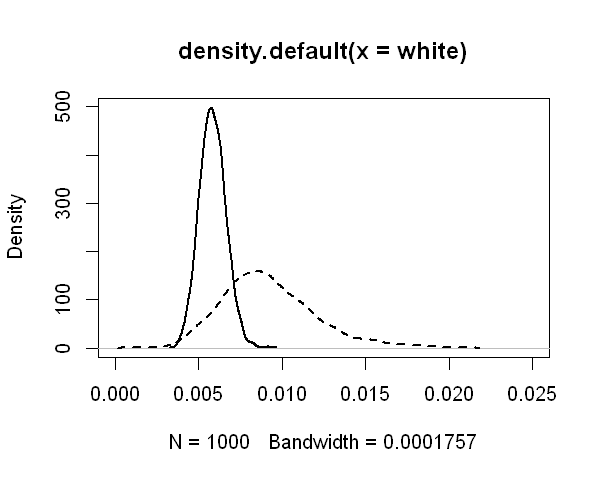

In [27]:
## Sample beta posterior distribution, given specified prior.
## Note that, in this specification, Beta( alpha + y, beta + n - y)
white <- rbeta(1000, (1 + 57), (100 + 9770 - 57)) ## Draw 1000
black <- rbeta(1000, (1 + 10), (100 + 1091 - 10)) ## Draw 1000

options(repr.plot.width=5, repr.plot.height=4)
plot(density(white), col="black", lty = 1, lwd=2, xlim = c(0, 0.025))
lines(density(black), col="black", lty = 2, lwd = 2)

We can calculate the "p-value" of Bayesian model as follows...

In [29]:
## Likelihood of black undervoting intention higher than white
table(black > white) 
## Calculate p-value of black undervotes more than whites
paste("Bayesian p-value is: ", table(black > white)[2] / 1000, 
      "(higher is better)")
## 95$ Credible Interval Can be Extracted Just as:
blackCI = quantile(black, probs=c(0.025, 0.095))
paste("Blac")
whiteCI = quantile(black, probs=c(0.025, 0.095))



FALSE  TRUE 
  114   886 

[1] "Bayesian p-value is:  0.886 (higher is better)"

(Note on Gamma Distribution: Shape = alpha; scale = beta)

### Mote-Carlo Simulation

 * **Problem**:  How do you solve multidimensional integral equations needed to model behavior of complex systems with many random quantities? <br><br>
 
 * **Solution**: We can learn learn by sampling many times from $f(\theta)$, the density of $\theta$. We assume that, as $n \rightarrow \infty$, $\hat{\theta} \rightarrow \theta$ (We borrow frequentist assumption).  

#### Rejection Sampling: 


In [34]:
## Some Complicated Function
target <- function(z){return((1/40)*(2*z+3))}
#
a <- 0 ## Lower Boundary
b <- 5 ## Higher Boundary
k <- 2
enveloping <- .2
ndraws <- 1000
proposed <- accept <- rep(NA,ndraws)
for (i in 1:ndraws){
proposed[i] <- z <- runif(1, a, b)
R <- target(z) / (k * enveloping)
if(R > runif(1, 0, 1)){accept[i] <- z}
}
target(2)
accept[1:10]
proposed[1:10]

[1] 0.175

[1]        NA 1.3448876 0.7848363 3.5551707 1.2674157 1.6766242        NA
 [8] 1.4892489 1.8753207        NA

[1] 3.5805265 1.3448876 0.7848363 3.5551707 1.2674157 1.6766242 2.7421494
 [8] 1.4892489 1.8753207 3.1127438

[1] 44

[1] 176

[1] 142

[1] 200

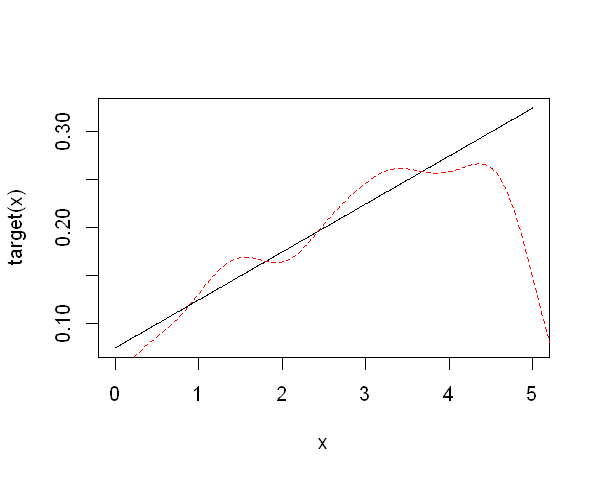

In [35]:
x <- seq(0,5,0.01)
plot(x, target(x), type="l")
lines(density(accept, na.rm=TRUE), lty=2, col="red")
#
length(proposed[accept < 1 & !is.na(accept)])
length(proposed[proposed < 1])
#
length(proposed[accept > 4 & !is.na(accept)])
length(proposed[proposed > 4])